<h1>Credit Card Fraud Detection</h1>

<h2>Problem Statement</h2>
<p>Digital payments are evolving, but so are cyber criminals.

    According to the Data Breach Index, more than 5 million records are being stolen on a daily basis, a concerning statistic that shows - fraud is still very common both for Card-Present and Card-not Present type of payments.

In today’s digital world where trillions of Card transaction happens per day, detection of fraud is challenging.

As fraudster change tactics, learning algorithm can be improvised adding more analyzed features 

    As a data scientist, you are required to construct a ML model based on the available data and justify how mature your model is for industry (bank- payment gateways or  VISA / Mastercard) in categorization & authorization of transaction based on efficiency in fraud detection.
•	Explore other performance characteristics like accuracy, specificity, the area under the precision-recall curve, confusion      matric etc. on the given dataset.

•	Identify all possible features critical in the identification of card frauds.


<h3>Expected Activites & Outcome

Construct a ML model based on the available data and justify how mature your model is for industry (bank- payment gateways or  VISA / Mastercard) in categorization & authorization of transaction based on efficiency in fraud detection

<h3>Obtained Performance Characteristics

In the process of constructing a ML model we have taken following actions step by step:
<ol>
<li>Step# 1: Understanding the problem statement
<li>Step# 2: Performing Exploratory Data Analysis
<li>Step# 3: Preprocessing the data
<li>Step# 4: Selection of Training and Test data
<li>Step# 5: Training, Testing and Evaluation with different models
<li>Step# 6: Handling Class Imbalance issue
</ol>

<h3>Models used for Evaluation

<ol>
<li>Decision Tree
<li>Random Forest
<li>K-Nearest Neighbours
<li>Logistic Regression
<li>XGBoost
</ol>

<h3>Model's Performance Measures

<ul>
<li>Accuracy
<li>Precision
<li>Recall
<li>F1-Score
<li>Confusion Matrix
<li>Principal Component Analysis
<li>ROC Curve
<li>Cumulative Gains Curve
<li>Lift Curve
<li>Precision Recall Curve
</ul>

In [90]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import itertools
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score, roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
import warnings

<h3>1. Perform Exploratory Data Analysis(EDA)</h3>

<h4>Loading the data

In [91]:
# Importing data set
# Make sure the notebook runs in the same directory as the input file 
dframe = pd.read_csv('card_transdata.csv')
dframe.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


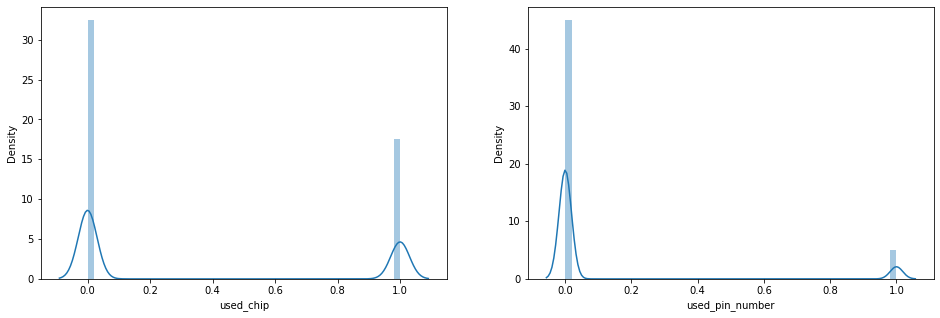

In [92]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sb.distplot(dframe['used_chip'])
plt.subplot(1,2,2)
sb.distplot(dframe['used_pin_number'])
plt.show()

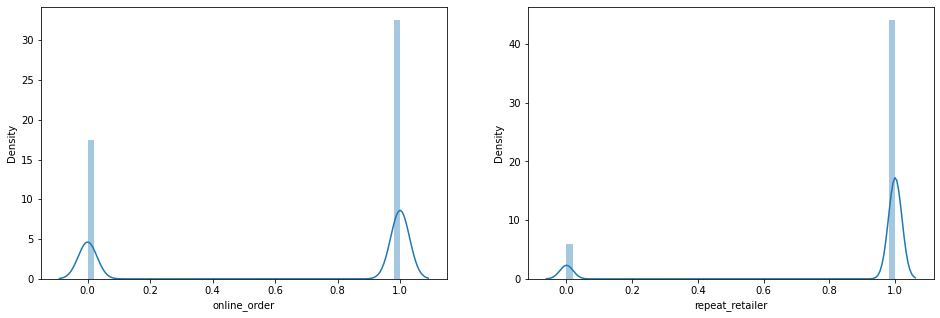

In [93]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sb.distplot(dframe['online_order'])
plt.subplot(1,2,2)
sb.distplot(dframe['repeat_retailer'])
plt.show()

From above graph, It is shown that major fraud happened with online order, then with using chip and less fraud by using pin number. Surprisingly, those frauds happened generally with repeated retailer.

Let's have a look at how many those repeated retailers are there where such frauds happened?

In [94]:
repeatedRetailerWithFraud = len(dframe[dframe.repeat_retailer == 1])
repeatedRetailerWithNonFraud = len(dframe[dframe.repeat_retailer == 0])

print("Non Fraud Transactions with repeated retailer: ", repeatedRetailerWithNonFraud)
print("Total Fraud Transactions with repeated retailer: ", repeatedRetailerWithFraud)

Non Fraud Transactions with repeated retailer:  118464
Total Fraud Transactions with repeated retailer:  881536


Above data doesn't conclude the classification.

Let's dig more.

In [95]:
# Get all the info about the data
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


As per above info, all the column features are not null with data type as float. Every features have equal size of records.

Let's check null  explicitly below.

<h4>Is there any null values?

In [96]:
# Check if there is any null  value
dframe.isnull().values.any()

False

This dataset doesn't have any null value. Means all the cells are properly filled with required data.

<h4>Getting more information about 3 major columns

We are more interested in knowing details about the features: distance_from_home, distance_from_last_transaction and ratio_to_median_purchase_price

In [97]:
dframe["distance_from_home"].describe()

count    1000000.000000
mean          26.628792
std           65.390784
min            0.004874
25%            3.878008
50%            9.967760
75%           25.743985
max        10632.723672
Name: distance_from_home, dtype: float64

In [98]:
dframe["distance_from_last_transaction"].describe()

count    1000000.000000
mean           5.036519
std           25.843093
min            0.000118
25%            0.296671
50%            0.998650
75%            3.355748
max        11851.104565
Name: distance_from_last_transaction, dtype: float64

In [99]:
dframe["ratio_to_median_purchase_price"].describe()

count    1000000.000000
mean           1.824182
std            2.799589
min            0.004399
25%            0.475673
50%            0.997717
75%            2.096370
max          267.802942
Name: ratio_to_median_purchase_price, dtype: float64

The standard deviation of distance_from_home feature is higher than rest of the twos, As next step let's check the class label.

<h4>How many Fraud and Non-Fraud Transactions?

In [100]:
nonFraud = len(dframe[dframe.fraud == 0])
fraud = len(dframe[dframe.fraud == 1])
fraudPercent = (fraud / (fraud + nonFraud)) * 100

print("Total Non Fraud Transactions: ", nonFraud)
print("Total Fraud Transactions: ", fraud)
print("Fraud transactions (%): {:.4f}".format(fraudPercent))

Total Non Fraud Transactions:  912597
Total Fraud Transactions:  87403
Fraud transactions (%): 8.7403


From the above outcome, we can clearly see fraud transactions are very less. So there could be chances of Class Imbalance problem. We will see  further.

Let's visualize above outcome through plot.

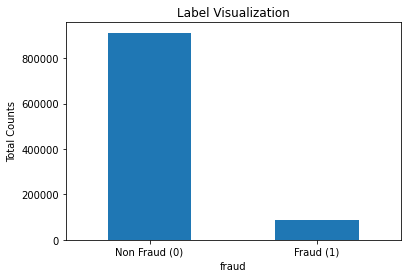

In [101]:
labels = ["Non Fraud (0)", "Fraud (1)"]
countFraudFature = dframe.value_counts(dframe['fraud'], sort= True)
countFraudFature.plot(kind = "bar", rot = 0)
plt.title("Label Visualization")
plt.ylabel("Total Counts")
plt.xticks(range(2), labels)
plt.show()

The above visualization shows Non fraud records are more than fraud records. This imbalences the dataset. We will further observe this in PCA.

<h3>2. Preprocess the data</h3>

<h4>How the attributes correlated

In [102]:
pearsoncorr = dframe.corr(method='pearson')

pearsoncorr

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


Above table shows the correlation between different features.

Let's visualize this through heatmap.

<AxesSubplot:>

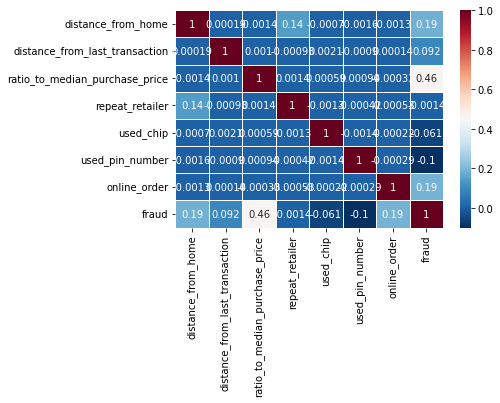

In [103]:
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

<h4>Drop Any Missing Values</h4>

In [104]:
dframe.dropna(inplace=True)

<h4>Are there any duplicate values?

In [105]:
dframe.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
999995    False
999996    False
999997    False
999998    False
999999    False
Length: 1000000, dtype: bool

In [106]:
dframe.duplicated().sum()

0

Above outcome shows that there is no duplicates in this dataset.

<h4>Normalization with z-score</h4>

Let's find out the difference of min and max value of distance_from_home

In [107]:
print("Min Max of distance_from_home")
min(dframe.distance_from_home),  max(dframe.distance_from_home)

Min Max of distance_from_home


(0.0048743850667442, 10632.723672241103)

In [108]:
print("Min Max of distance_from_last_transaction")
min(dframe.distance_from_last_transaction),  max(dframe.distance_from_last_transaction)

Min Max of distance_from_last_transaction


(0.000118281615244, 11851.10456494614)

In [109]:
print("Min Max of ratio_to_median_purchase_price")
min(dframe.ratio_to_median_purchase_price),  max(dframe.ratio_to_median_purchase_price)

Min Max of ratio_to_median_purchase_price


(0.004399239615964, 267.8029421832708)

We observe from above data that the difference is very huge so it may deviate the result. It would be great to scale the feature to fix this problem.

In [110]:
scaler = StandardScaler()
dframe["NormalizedDistanceFromHome"] = scaler.fit_transform(dframe["distance_from_home"].values.reshape(-1, 1))
dframe["NormalizedDistanceFromLastTransaction"] = scaler.fit_transform(dframe["distance_from_last_transaction"].values.reshape(-1, 1))
dframe["NormalizedRatioToMediaPurchPrice"] = scaler.fit_transform(dframe["ratio_to_median_purchase_price"].values.reshape(-1, 1))
dframe.drop(["distance_from_home", "distance_from_last_transaction","ratio_to_median_purchase_price"], inplace= True, axis= 1)

<h4>Outlier Analysis

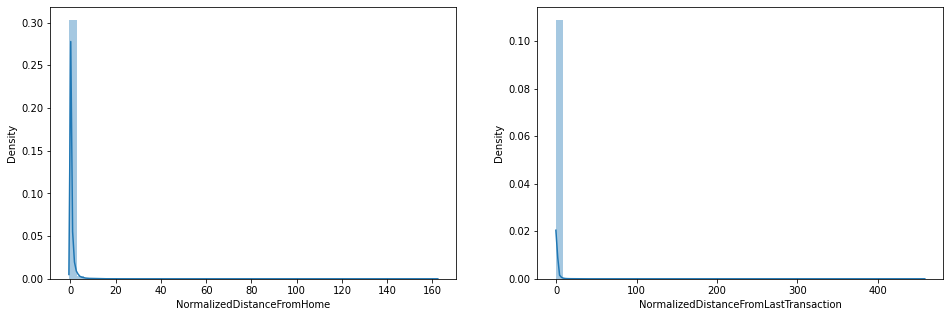

In [111]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sb.distplot(dframe['NormalizedDistanceFromHome'])
plt.subplot(1,2,2)
sb.distplot(dframe['NormalizedDistanceFromLastTransaction'])
plt.show()

<AxesSubplot:xlabel='NormalizedRatioToMediaPurchPrice', ylabel='Density'>

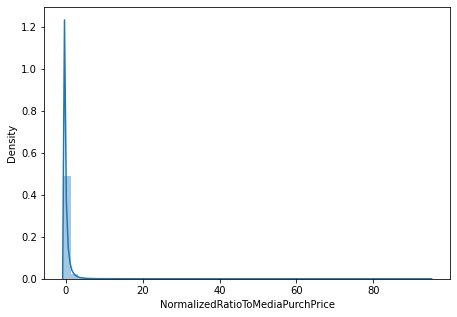

In [112]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sb.distplot(dframe['NormalizedRatioToMediaPurchPrice'])

<AxesSubplot:xlabel='NormalizedDistanceFromHome'>

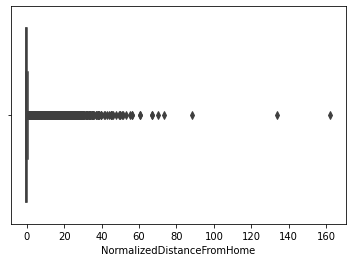

In [113]:
sb.boxplot(dframe['NormalizedDistanceFromHome'])

Finding IQR

In [114]:
percentile25 = dframe['NormalizedDistanceFromHome'].quantile(0.25)
percentile75 = dframe['NormalizedDistanceFromHome'].quantile(0.75)
iqr = percentile75-percentile25
print("IQR: ",iqr)

IQR:  0.33438944336982407


Finding Upper and Lower Limit


In [115]:
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

Finding Outliers

In [116]:
dframe[dframe['NormalizedDistanceFromHome'] > upper_limit]
dframe[dframe['NormalizedDistanceFromHome'] < lower_limit]

,repeat_retailer,used_chip,used_pin_number,online_order,fraud,NormalizedDistanceFromHome,NormalizedDistanceFromLastTransaction,NormalizedRatioToMediaPurchPrice


Trimming

In [117]:
new_df = dframe[dframe['NormalizedDistanceFromHome'] < upper_limit]
new_df.shape

(896369, 8)

Compare plots after trimming

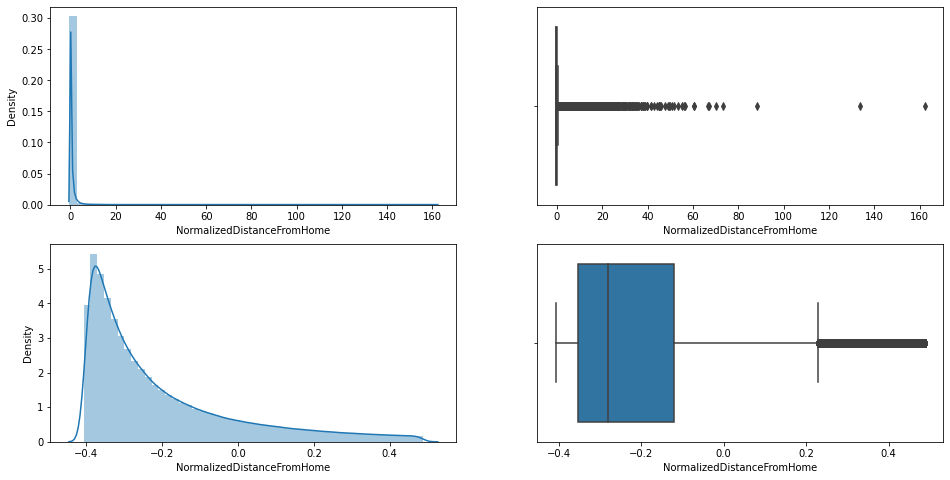

In [118]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sb.distplot(dframe['NormalizedDistanceFromHome'])
plt.subplot(2,2,2)
sb.boxplot(dframe['NormalizedDistanceFromHome'])
plt.subplot(2,2,3)
sb.distplot(new_df['NormalizedDistanceFromHome'])
plt.subplot(2,2,4)
sb.boxplot(new_df['NormalizedDistanceFromHome'])
plt.show()

Defining X & Y

In [126]:
Y = dframe["fraud"]
X = dframe.drop(["fraud"], axis= 1)
dframe.head()

,repeat_retailer,used_chip,used_pin_number,online_order,fraud,NormalizedDistanceFromHome,NormalizedDistanceFromLastTransaction,NormalizedRatioToMediaPurchPrice
0,1.0,1.0,0.0,0.0,0.0,0.477882,-0.182849,0.043491
1,1.0,0.0,0.0,0.0,0.0,-0.241607,-0.188094,-0.189300
2,1.0,0.0,0.0,1.0,0.0,-0.329369,-0.163733,-0.498812
3,1.0,1.0,0.0,1.0,0.0,-0.372854,0.021806,-0.522048
4,1.0,1.0,0.0,1.0,0.0,0.268572,-0.172968,0.142373


<h3>3. Select Training Data and Test Data</h3>

Now let's split the data in 70-30 ratio

In [127]:
(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.3, random_state= 100)

print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)
print(f"Training target statistics: {Counter(train_Y)}")
print(f"Testing target statistics: {Counter(test_Y)}")

Shape of train_X:  (700000, 7)
Shape of test_X:  (300000, 7)
Training target statistics: Counter({0.0: 638781, 1.0: 61219})
Testing target statistics: Counter({0.0: 273816, 1.0: 26184})


<h3>4. Training, Testing and Evaluation of Model Performance</h4>

In [128]:
# Display Matrices
def displayMetrics(actuals, predictions, modelname, model):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))
    print(f"{modelname} score: ", model.score(test_X, test_Y) * 100)
    

def buildAndTestModel(model, X_tr, y_tr, X_te, y_te, modelName, threshold=False):
    model.fit(X_tr, y_tr)

    # Test the model
    y_pred = model.predict(X_te)
    print(f"Matrices from {modelName} are: \n")
    displayMetrics(y_te, y_pred, modelName, model)
    y_score = model.predict_proba(X_te)
    fpr0, tpr0, thresholds = roc_curve(y_te, y_score[:, 1])
    roc_auc0 = auc(fpr0, tpr0)
    
    # Calculate the best threshold
    best_threshold = None
    if threshold:
        J = tpr0 - fpr0
        ix = np.argmax(J) # take the value which maximizes the J variable
        best_threshold = thresholds[ix]
        # adjust score according to threshold.
        y_score = np.array([[1, y[1]] if y[0] >= best_threshold else [0, y[1]] for y in y_score])
    
    # Plot metrics 
    plot_roc(y_te, y_score)
    plt.show()
    
    plot_precision_recall(y_te, y_score)
    plt.show()
    
    plot_cumulative_gain(y_te, y_score)
    plt.show()
    
    plot_lift_curve(y_te, y_score)
    plt.show()
    
    # Print a classification report
    print(f"Classification report of model {model} is: \n")
    print(classification_report(y_te,y_pred))
    return y_pred,roc_auc0,fpr0,tpr0,best_threshold

def plotConfusionMatrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=False`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

<h4>Principle Component Analysis (PCA)

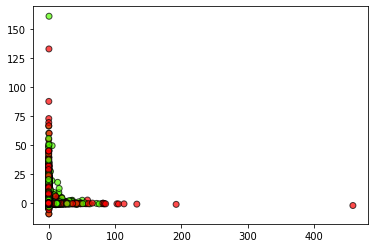

In [129]:
def getPCA(train_X,train_Y):
    pca = PCA(n_components=2)
    pca.fit(train_X)
    X_pca = pca.transform(train_X)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=train_Y, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
    plt.show()

getPCA(train_X,train_Y)

From the above analysis of PCA, it clearly shows this is the case of imbaance dataset.

Let's first get performance of model for imbalanced dataset.

<h4>Decision Tree</h4>

Matrices from Decision Tree are: 

Accuracy: 0.99998
Precision: 1.00000
Recall: 0.99981
F1-score: 0.99990
Decision Tree score:  99.99833333333333


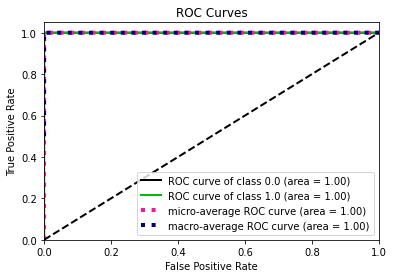

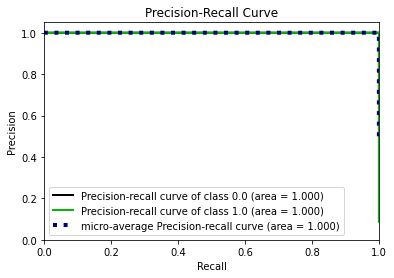

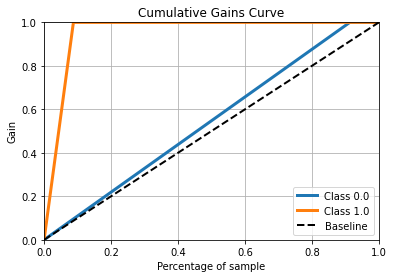

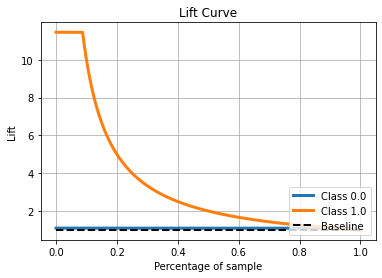

Classification report of model DecisionTreeClassifier() is: 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273816
         1.0       1.00      1.00      1.00     26184

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000

Confusion Matrix - Decision Tree
[[273816      0]
 [     5  26179]]
Confusion matrix, without normalization


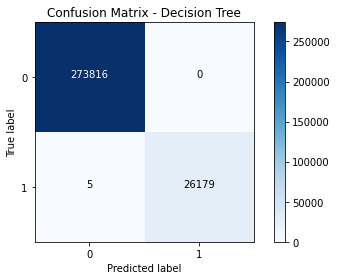

In [130]:
decisionTree = DecisionTreeClassifier()

y_pred,roc_auc0,fpr0,tpr0,best_threshold = buildAndTestModel(decisionTree, train_X, train_Y, test_X, test_Y, "Decision Tree", threshold=False)

confusion_matrix_dt = confusion_matrix(test_Y, y_pred.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)
plotConfusionMatrix(confusion_matrix_dt, classes=[0, 1], title= "Confusion Matrix - Decision Tree", normalize=False)


<h4>Random Forest

Matrices from Random Forest are: 

Accuracy: 0.99998
Precision: 1.00000
Recall: 0.99981
F1-score: 0.99990
Random Forest score:  99.99833333333333


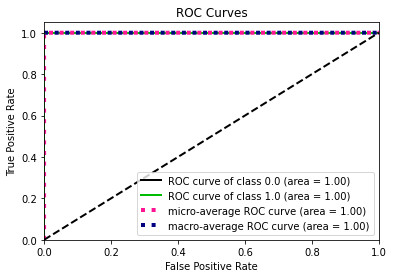

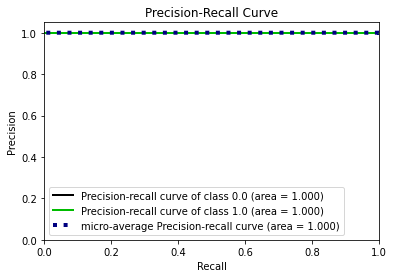

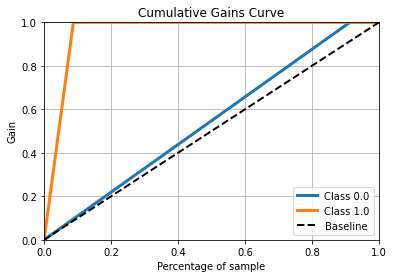

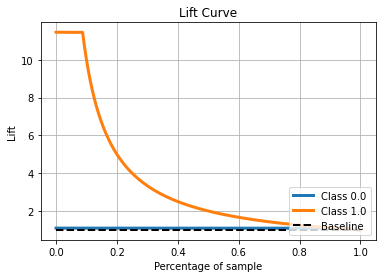

Classification report of model RandomForestClassifier() is: 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273816
         1.0       1.00      1.00      1.00     26184

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000

Confusion Matrix - Random Forest
[[273816      0]
 [     5  26179]]
Confusion matrix, without normalization


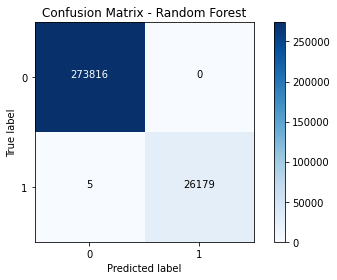

In [131]:
randomForest = RandomForestClassifier(n_estimators= 100)

y_pred,roc_auc0,fpr0,tpr0,best_threshold=buildAndTestModel(randomForest, train_X, train_Y, test_X, test_Y, "Random Forest", threshold=False)

confusion_matrix_dt = confusion_matrix(test_Y, y_pred.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_dt)
plotConfusionMatrix(confusion_matrix_dt, classes=[0, 1], title= "Confusion Matrix - Random Forest", normalize=False)

<h4>K-Nearest Neighbors

Matrices from KNN are: 

Accuracy: 0.99865
Precision: 0.99383
Recall: 0.99068
F1-score: 0.99225
KNN score:  99.86500000000001


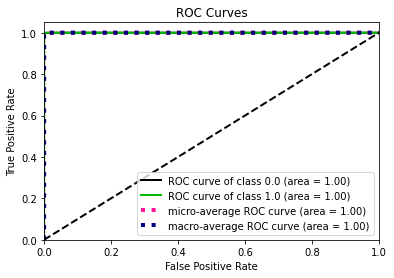

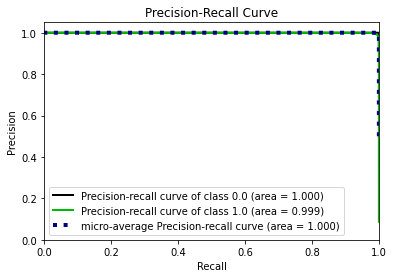

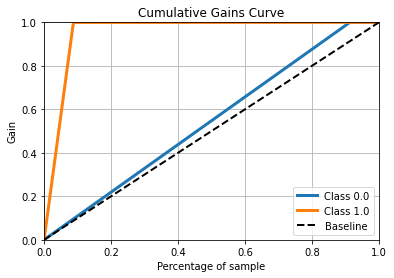

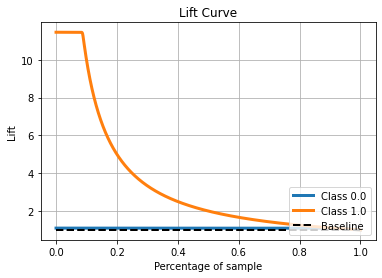

Classification report of model KNeighborsClassifier(n_neighbors=7) is: 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273816
         1.0       0.99      0.99      0.99     26184

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000

Confusion Matrix - KNN
[[273655    161]
 [   244  25940]]
Confusion matrix, without normalization


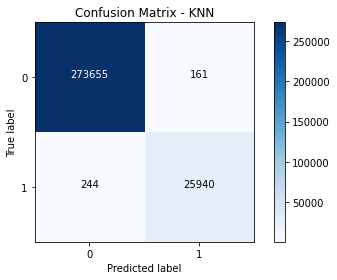

In [132]:
knn = KNeighborsClassifier(n_neighbors = 7)
y_pred,roc_auc0,fpr0,tpr0,best_threshold=buildAndTestModel(knn, train_X, train_Y, test_X, test_Y, "KNN", threshold=False)

confusion_matrix_dt = confusion_matrix(test_Y, y_pred.round())
print("Confusion Matrix - KNN")
print(confusion_matrix_dt)
plotConfusionMatrix(confusion_matrix_dt, classes=[0, 1], title= "Confusion Matrix - KNN", normalize=False)

<h4>Logistic Regression

Matrices from Logistic Regression are: 

Accuracy: 0.95852
Precision: 0.89171
Recall: 0.59723
F1-score: 0.71535
Logistic Regression score:  95.85166666666667


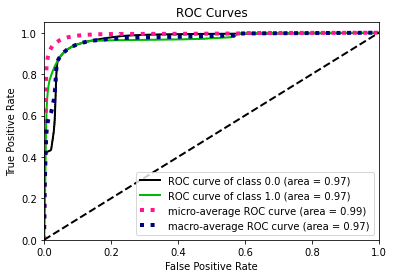

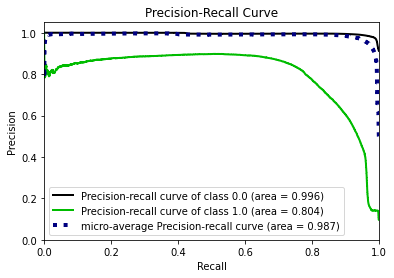

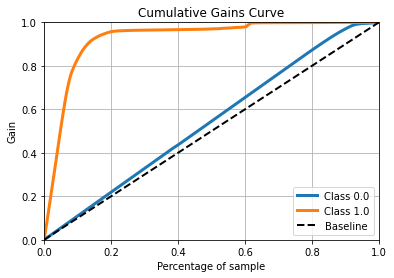

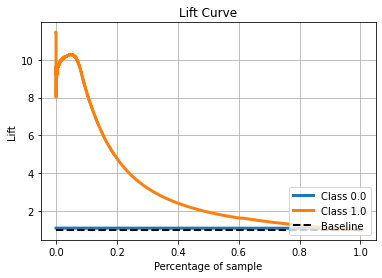

Classification report of model LogisticRegression() is: 

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    273816
         1.0       0.89      0.60      0.72     26184

    accuracy                           0.96    300000
   macro avg       0.93      0.80      0.85    300000
weighted avg       0.96      0.96      0.95    300000

Confusion Matrix - Logistic Regression
[[271917   1899]
 [ 10546  15638]]
Confusion matrix, without normalization


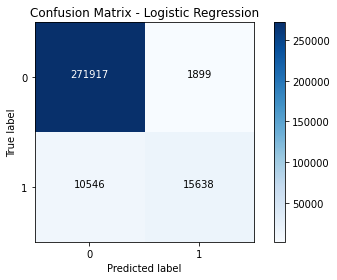

In [133]:
logisticRegression = LogisticRegression()
y_pred,roc_auc0,fpr0,tpr0,best_threshold=buildAndTestModel(logisticRegression, train_X, train_Y, test_X, test_Y, "Logistic Regression", threshold=False)

confusion_matrix_dt = confusion_matrix(test_Y, y_pred.round())
print("Confusion Matrix - Logistic Regression")
print(confusion_matrix_dt)
plotConfusionMatrix(confusion_matrix_dt, classes=[0, 1], title= "Confusion Matrix - Logistic Regression", normalize=False)

<h4>XGBoost

Matrices from XGBoost are: 

Accuracy: 0.99998
Precision: 1.00000
Recall: 0.99977
F1-score: 0.99989
XGBoost score:  99.998


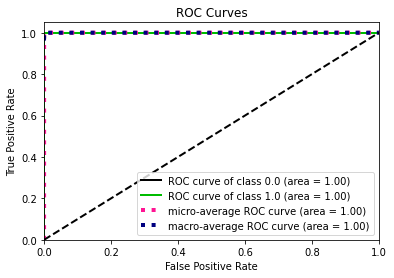

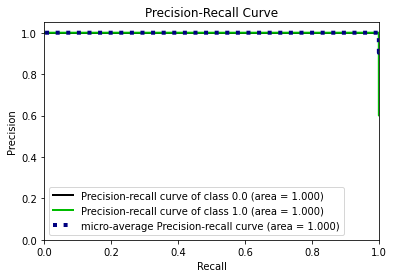

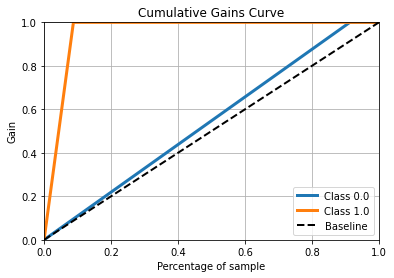

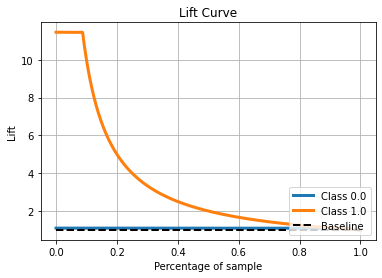

Classification report of model XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None) is: 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273816
         1.0       1.00      1.00      1.00     26184

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00 

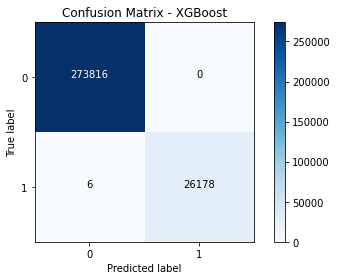

In [134]:
xgb = XGBClassifier(max_depth = 4, use_label_encoder=False, eval_metric='mlogloss')
y_pred,roc_auc0,fpr0,tpr0,best_threshold=buildAndTestModel(xgb, train_X, train_Y, test_X, test_Y, "XGBoost", threshold=False)

confusion_matrix_dt = confusion_matrix(test_Y, y_pred.round())
print("Confusion Matrix - XGBoost")
print(confusion_matrix_dt)
plotConfusionMatrix(confusion_matrix_dt, classes=[0, 1], title= "Confusion Matrix - XGBoost", normalize=False)

<h3>5. Class Imbalance Issue

We have trained and tested our dataset on several models like Decision Tree, Random Forst, KNN, Logistic Regression, and XGBoost. Our observation says that <b>Random Forest</b> would be the best choice as it has <b>Accuracy: 0.99998 and Recall: 0.99981</b>; So conceptually, model which gives high recall and high precision perfectly handles the fraud scenario.

There are 912597 non fraud transactions and 87403 fraud transactions which constitues 91.2597% and 8.7403% respectively. As we can see non fraud transactions are higher and if we build our model with imbalanced data then it will predict the label biased towards genuine transactions.

Followings are the ways to overcome the Class Imbalance Issue:
<ul>
<li>Oversample the minority class
<li>Undersample the majority class
<li>Class Weight Technique
<li>Threshold Technique
</ul>

We again resample the data and will further split using train_test_split() in the ratio of 70:30.

<h4>Oversample the minority class

<h5>Synthetic Minority Oversampling Technique (SMOTE)

We solve such type of class imbalance problem using oversampling, It simply means that oversampling the class which is in minority.

In [135]:
from imblearn.over_sampling import SMOTE

X_resampled_smote, Y_resampled_smote = SMOTE().fit_resample(train_X, train_Y)
print("Resampled shape of X: ", X_resampled_smote.shape)
print("Resampled shape of Y: ", Y_resampled_smote.shape)
print(f"Training target statistics: {Counter(Y_resampled_smote)}")

Resampled shape of X:  (1277562, 7)
Resampled shape of Y:  (1277562,)
Training target statistics: Counter({0.0: 638781, 1.0: 638781})


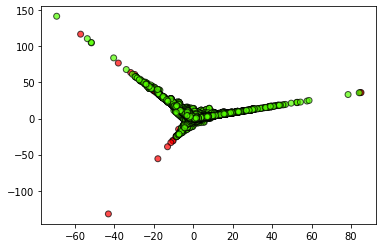

In [136]:
getPCA(X_resampled_smote,Y_resampled_smote)

Matrices from Random Forest - SMOTE are: 

Accuracy: 0.99999
Precision: 1.00000
Recall: 0.99985
F1-score: 0.99992
Random Forest - SMOTE score:  99.99866666666667


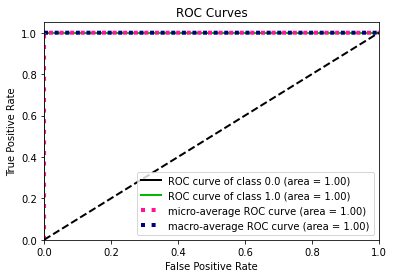

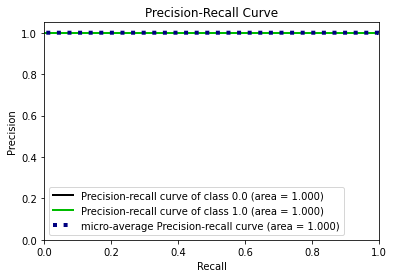

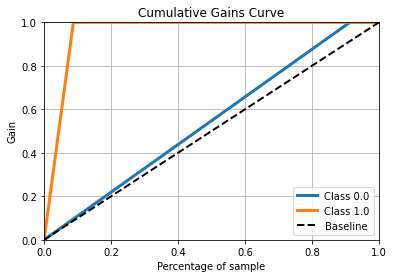

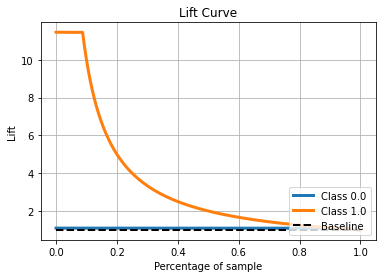

Classification report of model RandomForestClassifier() is: 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273816
         1.0       1.00      1.00      1.00     26184

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000

Confusion Matrix - Random Forest- SMOTE
[[273816      0]
 [     4  26180]]
Confusion matrix, without normalization


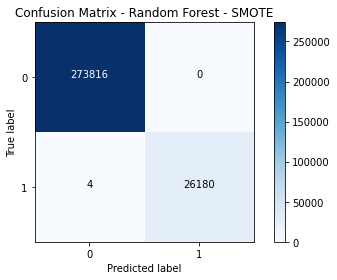

In [137]:
randomForest = RandomForestClassifier(n_estimators= 100)

y_pred_smote,roc_auc_smote,fpr_smote,tpr_smote, _ =buildAndTestModel(randomForest, X_resampled_smote, Y_resampled_smote, test_X, test_Y, "Random Forest - SMOTE", threshold=False)

confusion_matrix_dt = confusion_matrix(test_Y, y_pred_smote.round())
print("Confusion Matrix - Random Forest- SMOTE")
print(confusion_matrix_dt)
plotConfusionMatrix(confusion_matrix_dt, classes=[0, 1], title= "Confusion Matrix - Random Forest - SMOTE", normalize=False)

<h5>Random Over Sampler

Random Over Sampler is a module inside imblearn over sampling, which increases the number of samples of smaller class up to the size of larger class.

In [138]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_res_rndovsmp , y_res_rndovsmp = over_sampler.fit_resample(train_X, train_Y)
print("Resampled shape of X: ", X_res_rndovsmp.shape)
print("Resampled shape of Y: ", y_res_rndovsmp.shape)
print(f"Training target statistics: {Counter(y_res_rndovsmp)}")

Resampled shape of X:  (1277562, 7)
Resampled shape of Y:  (1277562,)
Training target statistics: Counter({0.0: 638781, 1.0: 638781})


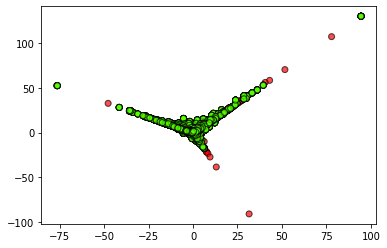

In [139]:
getPCA(X_res_rndovsmp,y_res_rndovsmp)

Matrices from Random Forest - RandomOverSampling are: 

Accuracy: 0.99999
Precision: 1.00000
Recall: 0.99989
F1-score: 0.99994
Random Forest - RandomOverSampling score:  99.99900000000001


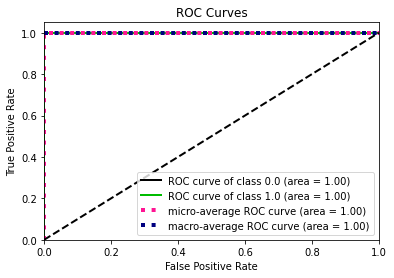

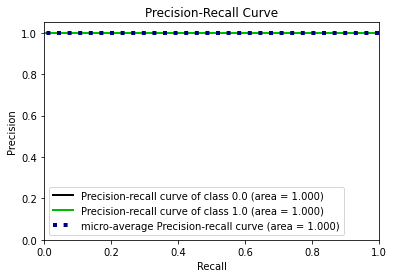

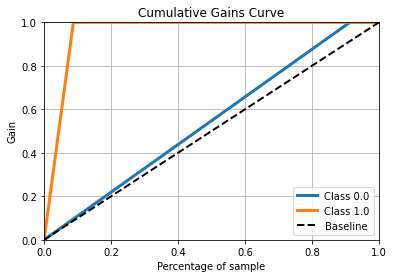

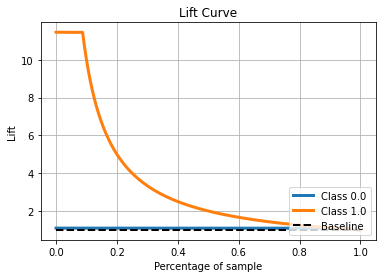

Classification report of model RandomForestClassifier() is: 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273816
         1.0       1.00      1.00      1.00     26184

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000

Confusion Matrix - Random Forest- RandomOverSampling
[[273816      0]
 [     3  26181]]
Confusion matrix, without normalization


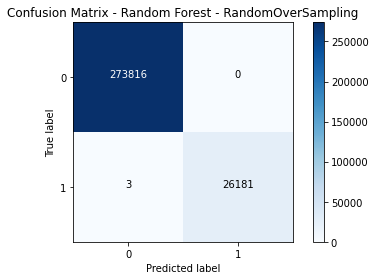

In [140]:
randomForest = RandomForestClassifier(n_estimators= 100)

y_pred_rndovsm,roc_auc_ros,fpr_ros,tpr_ros, _=buildAndTestModel(randomForest, X_res_rndovsmp, y_res_rndovsmp, test_X, test_Y, "Random Forest - RandomOverSampling", threshold=False)

confusion_matrix_dt = confusion_matrix(test_Y, y_pred_rndovsm.round())
print("Confusion Matrix - Random Forest- RandomOverSampling")
print(confusion_matrix_dt)
plotConfusionMatrix(confusion_matrix_dt, classes=[0, 1], title= "Confusion Matrix - Random Forest - RandomOverSampling", normalize=False)

<h4>Undersample the majority class

<h5>Random Under Sampler

Random Under Sampler is a module inside imblearn under sampling, which reduces the number of samples of larger class down to the size of smaller class.

In [141]:
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(random_state=42)
X_res_rndundsmpl, y_res_rndundsmpl = under_sampler.fit_resample(train_X, train_Y)
print(f"Training target statistics: {Counter(y_res_rndundsmpl)}")
print(f"Testing target statistics: {Counter(test_Y)}")

Training target statistics: Counter({0.0: 61219, 1.0: 61219})
Testing target statistics: Counter({0.0: 273816, 1.0: 26184})


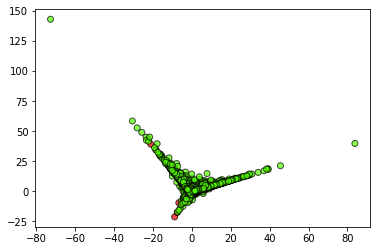

In [142]:
getPCA(X_res_rndundsmpl,y_res_rndundsmpl)

Matrices from Random Forest - RandomUnderSampling are: 

Accuracy: 0.99992
Precision: 0.99905
Recall: 1.00000
F1-score: 0.99952
Random Forest - RandomUnderSampling score:  99.99166666666667


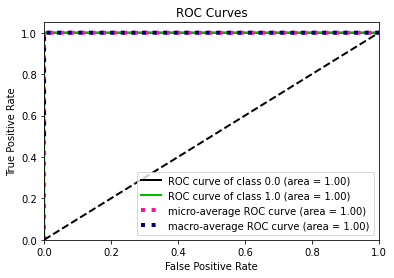

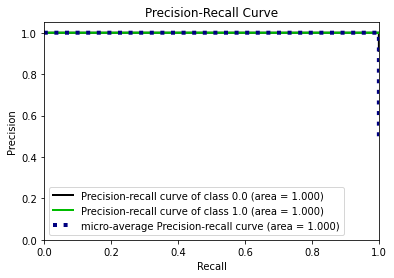

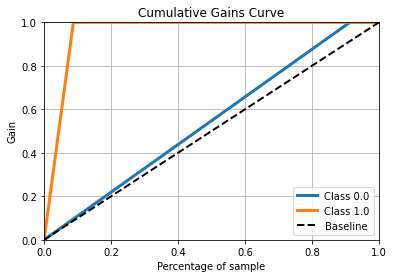

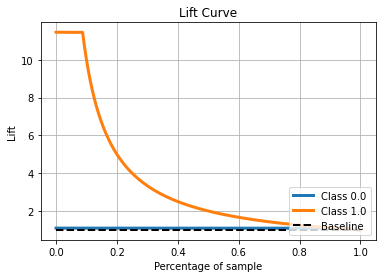

Classification report of model RandomForestClassifier() is: 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273816
         1.0       1.00      1.00      1.00     26184

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000

Confusion Matrix - Random Forest- RandomUnderSampling
[[273791     25]
 [     0  26184]]
Confusion matrix, without normalization


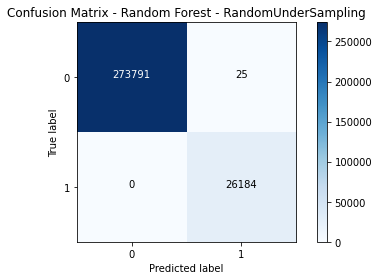

In [143]:
randomForest = RandomForestClassifier(n_estimators= 100)

y_pred_rndundsmpl,roc_auc_rus,fpr_rus,tpr_rus , _=buildAndTestModel(randomForest, X_res_rndundsmpl, y_res_rndundsmpl, test_X, test_Y, "Random Forest - RandomUnderSampling", threshold=False)

confusion_matrix_dt = confusion_matrix(test_Y, y_pred_rndundsmpl.round())
print("Confusion Matrix - Random Forest- RandomUnderSampling")
print(confusion_matrix_dt)
plotConfusionMatrix(confusion_matrix_dt, classes=[0, 1], title= "Confusion Matrix - Random Forest - RandomUnderSampling", normalize=False)

<h5>NearMiss Under Sampler

NearMiss is a technique to perform Under sampling when dataset is tendinig towards biasness. It first find the distance between every points of the larger class with the points in the smaller class. It then checks the instances in larger class which has lesser distance with smaller class. These are terms as n class. Finally, it checks for such instances in smaller class and denote them as m. So algorithm will find out m*n instances of larger class.

In [144]:
from imblearn.under_sampling import NearMiss

under_sampler = NearMiss()
X_res_nearmiss, y_res_nearmiss = under_sampler.fit_resample(train_X, train_Y)
print(f"Training target statistics: {Counter(y_res_nearmiss)}")
print(f"Testing target statistics: {Counter(test_Y)}")

Training target statistics: Counter({0.0: 61219, 1.0: 61219})
Testing target statistics: Counter({0.0: 273816, 1.0: 26184})


Matrices from Random Forest - NearMiss are: 

Accuracy: 0.99250
Precision: 0.92087
Recall: 0.99996
F1-score: 0.95879
Random Forest - NearMiss score:  99.24966666666667


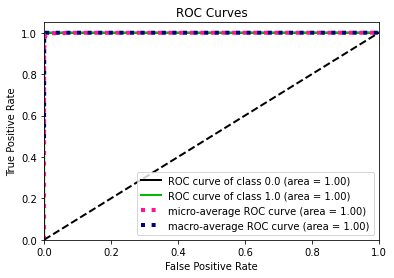

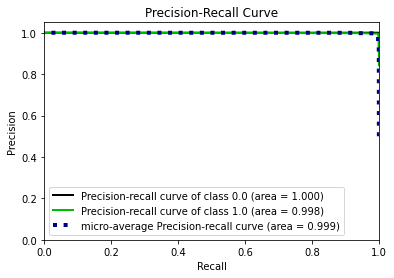

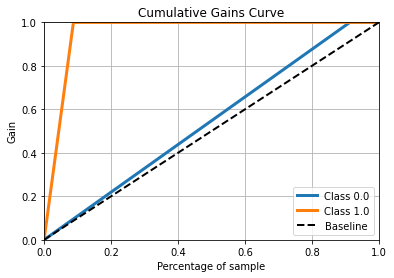

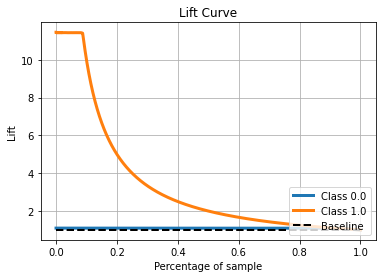

Classification report of model RandomForestClassifier() is: 

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00    273816
         1.0       0.92      1.00      0.96     26184

    accuracy                           0.99    300000
   macro avg       0.96      1.00      0.98    300000
weighted avg       0.99      0.99      0.99    300000

Confusion Matrix - Random Forest- NearMiss
[[271566   2250]
 [     1  26183]]
Confusion matrix, without normalization


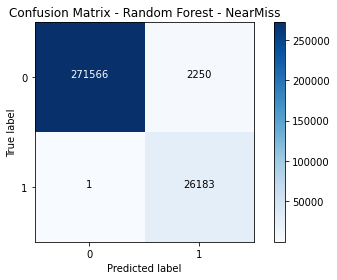

In [145]:
randomForest = RandomForestClassifier(n_estimators= 100)

y_pred_nearmiss,roc_auc_nm,fpr_nm,tpr_nm, _=buildAndTestModel(randomForest, X_res_nearmiss, y_res_nearmiss, test_X, test_Y, "Random Forest - NearMiss", threshold=False)

confusion_matrix_dt = confusion_matrix(test_Y, y_pred_nearmiss.round())
print("Confusion Matrix - Random Forest- NearMiss")
print(confusion_matrix_dt)
plotConfusionMatrix(confusion_matrix_dt, classes=[0, 1], title= "Confusion Matrix - Random Forest - NearMiss", normalize=False)

<h4>Class Weight

It is a python dictionary which sets some weight of the model defined inside Scikit learn. We are setting weight of the biggest class to 1 and weight of the smallest class would be the ration of total nummber of samples of biggest class to the number of samples of the smallest class.

In [146]:
n= Counter(train_Y)
ratio = int(n[1]/n[0])
ratio, n

(0, Counter({0.0: 638781, 1.0: 61219}))

Matrices from Random Forest - Class Weight are: 

Accuracy: 0.91272
Precision: 0.00000
Recall: 0.00000
F1-score: 0.00000
Random Forest - Class Weight score:  91.27199999999999


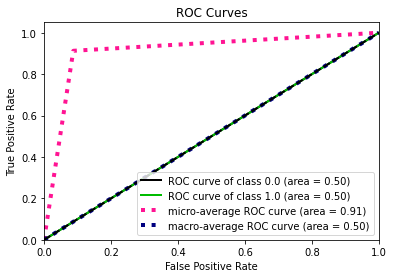

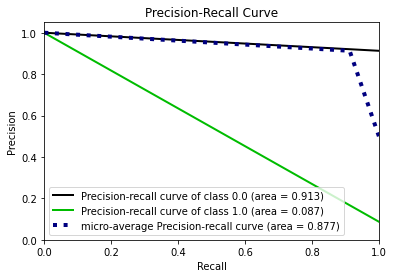

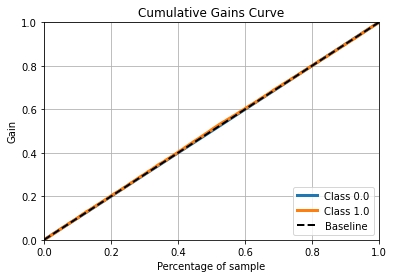

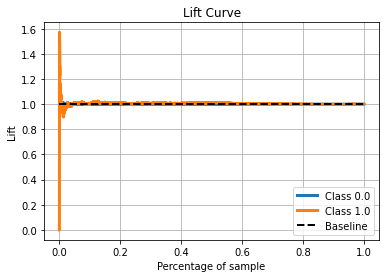

Classification report of model RandomForestClassifier(class_weight={0: 1, 1: 0}) is: 

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95    273816
         1.0       0.00      0.00      0.00     26184

    accuracy                           0.91    300000
   macro avg       0.46      0.50      0.48    300000
weighted avg       0.83      0.91      0.87    300000

Confusion Matrix - Random Forest- Class Weight
[[273816      0]
 [ 26184      0]]
Confusion matrix, without normalization


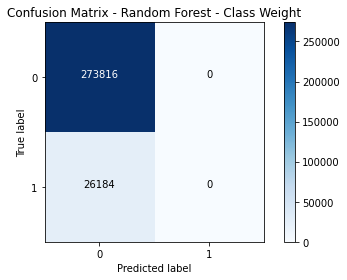

In [147]:
randomForest = RandomForestClassifier(n_estimators= 100,class_weight={0:1, 1:ratio})

y_pred_class,roc_auc_cw,fpr_cw,tpr_cw, _ =buildAndTestModel(randomForest, train_X, train_Y, test_X, test_Y, "Random Forest - Class Weight", threshold=False)

confusion_matrix_dt = confusion_matrix(test_Y, y_pred_class.round())
print("Confusion Matrix - Random Forest- Class Weight")
print(confusion_matrix_dt)
plotConfusionMatrix(confusion_matrix_dt, classes=[0, 1], title= "Confusion Matrix - Random Forest - Class Weight", normalize=False)

<h4>Threshold

This is a manual technique to balance the dataset. Class label is set to 1 when predicted value is greater than threshold value, else, it is set to 0.

Matrices from Random Forest - Threshold are: 

Accuracy: 0.99999
Precision: 1.00000
Recall: 0.99985
F1-score: 0.99992
Random Forest - Threshold score:  99.99866666666667


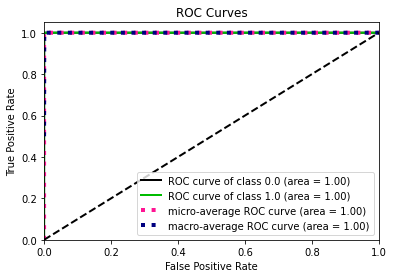

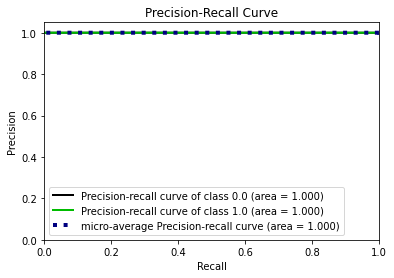

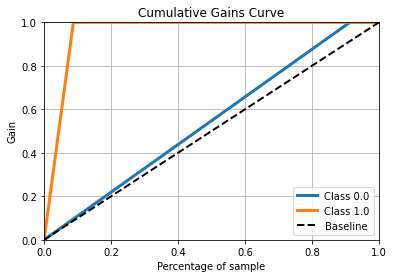

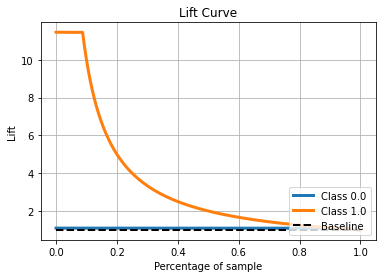

Classification report of model RandomForestClassifier() is: 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273816
         1.0       1.00      1.00      1.00     26184

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000

Best Treshold: 0.28
Confusion Matrix - Random Forest- Threshold
[[273816      0]
 [     4  26180]]
Confusion matrix, without normalization


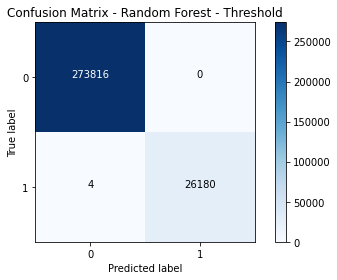

In [148]:
randomForest = RandomForestClassifier(n_estimators= 100)

y_pred_th,roc_auc_thr,fpr_thr,tpr_thr, threshold=buildAndTestModel(randomForest, train_X, train_Y, test_X, test_Y, "Random Forest - Threshold", threshold=True)
print(f"Best Treshold: {threshold}")
confusion_matrix_dt = confusion_matrix(test_Y, y_pred_th.round())
print("Confusion Matrix - Random Forest- Threshold")
print(confusion_matrix_dt)
plotConfusionMatrix(confusion_matrix_dt, classes=[0, 1], title= "Confusion Matrix - Random Forest - Threshold", normalize=False)

<h3>6. Conclusion

As per exploratory data analysis, we found that there are more number of fraud class as compared to non fraud class and mostly fraud transactions happened with repeated retailer in online mode of transaction. We also found that there is a greater standard deviation in distance from home transaction so we normalized it first then further detected and removed outliersfrom first three columns.
<p>We evaluated our dataset with multiple models like Decision Tree, Random Forest, KNN, Logistic Regression, and XGBoost over different performance parameters like Accuracy, Precision, Recall, F1-Sore, ROC, AUC, Lift Curve and Cumalative Gain Curve. We found Random Forest gave the best fit according to Accuracy and Recall factor.</p>
<p>Since the beginning, the dataset was detected imbalanced. So to overcome the imbalance nature of dataset, we have applied various techniques like SMOTE, Random Over Sampler, Random Under Sampler, NearMiss, Class Weight and Threshold. We found Random Under Sampler, SMOTE, and Random Over Sampler gave the best outcome of Accuracy and Recall.</p?>

<p><b>Hence, Random Forest with Random Under Sampler is the best fit.</b></p>

<p>Let's have a look at consolidated plot below.</p>

<h4>Cosolidated Plot

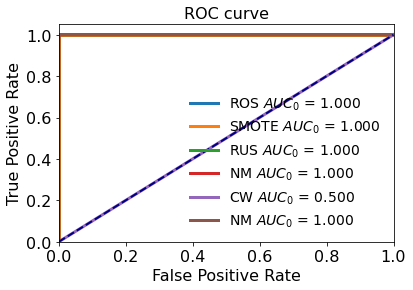

In [149]:
plt.plot(fpr_ros, tpr_ros, lw=3, label='ROS $AUC_0$ = %.3f' % (roc_auc_ros))
plt.plot(fpr_smote, tpr_smote, lw=3, label='SMOTE $AUC_0$ = %.3f' % (roc_auc_smote))
plt.plot(fpr_rus, tpr_rus, lw=3, label='RUS $AUC_0$ = %.3f' % (roc_auc_rus))
plt.plot(fpr_nm, tpr_nm, lw=3, label='NM $AUC_0$ = %.3f' % (roc_auc_nm))
plt.plot(fpr_cw, tpr_cw, lw=3, label='CW $AUC_0$ = %.3f' % (roc_auc_cw))
plt.plot(fpr_thr, tpr_thr, lw=3, label='NM $AUC_0$ = %.3f' % (roc_auc_thr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()